In [654]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
warnings.filterwarnings("ignore")
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
warnings.filterwarnings("ignore")
import pandas as pd

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [655]:

df = pd.read_csv('filtered.csv')

## OUTLIER REMOVAL

In [656]:
df.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'game_season', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'match_id', 'team_id',
       'AAdistance_of_shot_c', 'AAremaining_min_clean', 'AAtype_of_shot',
       'AAremaining_sec_c', 'AAknockout_match', 'AApower_of_shot'],
      dtype='object')

In [657]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,is_goal,shot_id_number,match_id,team_id,AAdistance_of_shot_c,AAremaining_min_clean,AAremaining_sec_c,AAknockout_match,AApower_of_shot
count,30697.000000,29134.000000,29236.000000,29157.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,30600.000000,30616.000000,30328.000000,29211.000000,30627.000000
mean,15348.000000,249.576028,7.383876,91.126933,0.445331,15368.581039,2.476407e+07,1.610613e+09,33.708650,5.556376,28.441111,2.519359,3.108937
std,8861.604943,150.186019,110.263049,87.676395,0.497013,8866.520772,7.755175e+06,0.000000e+00,10.059333,8.157191,17.462844,1.153976,6.761758
min,0.000000,2.000000,-250.000000,-44.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,9.400000,0.000000,0.000000,1.000000,1.000000
25%,7674.000000,111.000000,-68.000000,4.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,25.000000,2.000000,13.000000,1.000000,1.000000
50%,15348.000000,254.000000,0.000000,74.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,35.000000,5.000000,28.000000,3.000000,3.000000
75%,23022.000000,369.000000,95.000000,160.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,41.000000,8.000000,43.000000,3.000000,4.000000
max,30696.000000,659.000000,248.000000,791.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,113.728000,127.000000,59.000000,7.000000,118.360000


In [658]:
def outlier_removal(df , cols , hi , lo):
    for col in cols :
        quant_df = df[col].quantile([lo, hi])
        low_range = quant_df.iloc[0]
        hi_range = quant_df.iloc[1]
        df[col] = np.where( (df[col] >= low_range) & (df[col] <= hi_range) , df[col] , np.nan)
    return df
rem_cols = ['AAremaining_min_clean', 
       'AAremaining_sec_c',]
df = outlier_removal(df , rem_cols , 0.99 , 0.01)
rem_cols = ['location_x', 'location_y','AAdistance_of_shot_c']
df = outlier_removal(df , rem_cols , 0.999 , 0.001)

In [659]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,is_goal,shot_id_number,match_id,team_id,AAdistance_of_shot_c,AAremaining_min_clean,AAremaining_sec_c,AAknockout_match,AApower_of_shot
count,30697.000000,29134.000000,29181.000000,29100.000000,24429.000000,29134.000000,3.069700e+04,3.069700e+04,30548.000000,30314.000000,30328.000000,29211.000000,30627.000000
mean,15348.000000,249.576028,7.405675,90.671993,0.445331,15368.581039,2.476407e+07,1.610613e+09,33.651248,4.882200,28.441111,2.519359,3.108937
std,8861.604943,150.186019,109.859194,85.804452,0.497013,8866.520772,7.755175e+06,0.000000e+00,9.805122,3.450802,17.462844,1.153976,6.761758
min,0.000000,2.000000,-240.000000,-33.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,20.000000,0.000000,0.000000,1.000000,1.000000
25%,7674.000000,111.000000,-68.000000,4.000000,0.000000,7693.250000,2.050008e+07,1.610613e+09,25.000000,2.000000,13.000000,1.000000,1.000000
50%,15348.000000,254.000000,0.000000,74.000000,0.000000,15378.500000,2.090035e+07,1.610613e+09,35.000000,5.000000,28.000000,3.000000,3.000000
75%,23022.000000,369.000000,95.000000,160.000000,1.000000,23055.750000,2.960047e+07,1.610613e+09,41.000000,8.000000,43.000000,3.000000,4.000000
max,30696.000000,659.000000,240.000000,564.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,97.000000,11.000000,59.000000,7.000000,118.360000


In [660]:
df['home'] = df['home/away'].str.split().str[0]
df['away'] = df['home/away'].str.split().str[2]

df['home'].value_counts()

MANU    29200
Name: home, dtype: int64

### How many times is this shot successful (Goal/miss)

In [661]:
df_goal = df[df['is_goal'] == 1]
df_miss = df[df['is_goal'] == 0]
def pct_success(df1 , df2 , col) :
    sr = df1[col].value_counts()/(df2[col].value_counts() + df1[col].value_counts())
    
    print(sr.reset_index().sort_values(col))

In [662]:
len(df_goal)/(len(df_miss)+len(df_goal))

0.4453313684555242

In [663]:
pct_success(df_goal , df_miss , 'shot_basics')

             index  shot_basics
3  Mid Ground Line     0.017544
5     Penalty Spot     0.334040
6     Right Corner     0.334437
2      Left Corner     0.365741
4        Mid Range     0.406092
1        Goal Line     0.453485
0        Goal Area     0.618073


In [664]:
m = df.corr()
(m['is_goal'])

Unnamed: 0              -0.012693
match_event_id          -0.038705
location_x              -0.005177
location_y              -0.141848
is_goal                  1.000000
shot_id_number          -0.010696
match_id                -0.000169
team_id                       NaN
AAdistance_of_shot_c    -0.187130
AAremaining_min_clean    0.027207
AAremaining_sec_c        0.030249
AAknockout_match        -0.034698
AApower_of_shot         -0.010626
Name: is_goal, dtype: float64

In [665]:
df.team_id.value_counts()


1610612747    30697
Name: team_id, dtype: int64

Team ID is always the same , so we ignore it.

In [666]:
plt.figure(figsize = (20 , 20))
#sns.heatmap(df.corr() , annot = True , linewidth = 0.5 , cmap = 'coolwarm' , cbar = False)

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [667]:
df_train = df
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
is_goal,6268,0.204189
game_season,5862,0.190963
location_y,1597,0.052025
shot_basics,1575,0.051308
lat/lng,1565,0.050982
range_of_shot,1564,0.050950
match_event_id,1563,0.050917
shot_id_number,1563,0.050917
date_of_game,1550,0.050494
team_name,1535,0.050005


In [668]:
df['game_season'] = df['game_season'].ffill()

In [669]:
np.nan

nan

(array([10347.,  5203.,  5037.,  4955.,  3216.,   249.,    37.,    27.,
           18.,    11.]),
 array([-33. ,  26.7,  86.4, 146.1, 205.8, 265.5, 325.2, 384.9, 444.6,
        504.3, 564. ]),
 <a list of 10 Patch objects>)

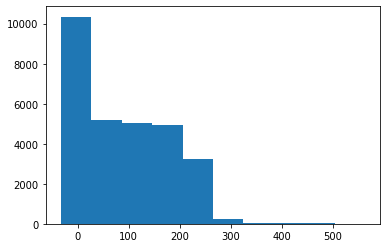

In [670]:
plt.hist(df['location_y'])

In [671]:
#df.head()
#df['location_y'] = np.where(df['location_y'] > 300 , 300 , df['location_y'])
#data[col] = np.where(data[col].isna(), data[col+'.1'], data[col])

## Replace shot_basics and dist_of_shot using each other

In [672]:
df['shot_basics'].unique()

array(['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot', nan,
       'Right Corner', 'Mid Ground Line', 'Left Corner'], dtype=object)

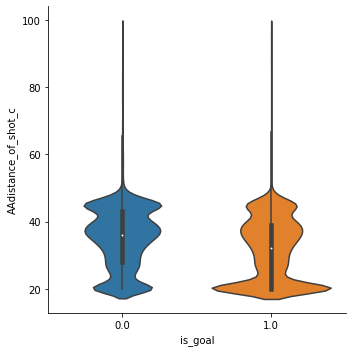

In [673]:
sns.catplot(x="is_goal", y="AAdistance_of_shot_c", kind="violin", data=df);

### Distance of shot vs target

*******Mid Range***********


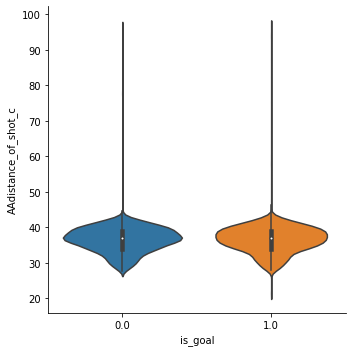

*******Goal Area***********


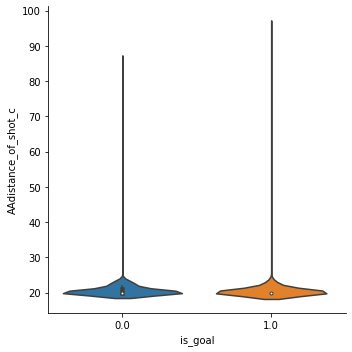

*******Goal Line***********


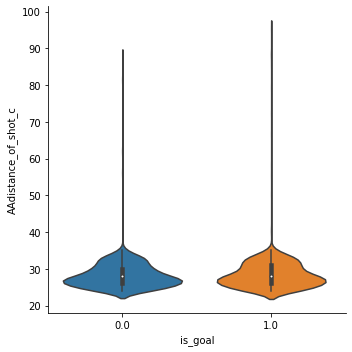

*******Penalty Spot***********


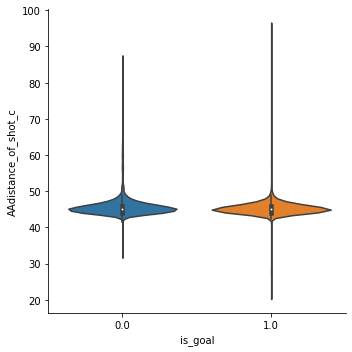

*******Right Corner***********


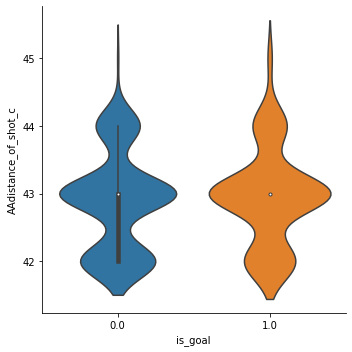

*******Mid Ground Line***********


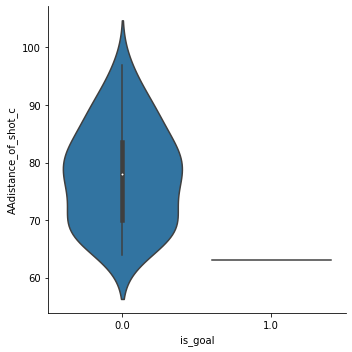

*******Left Corner***********


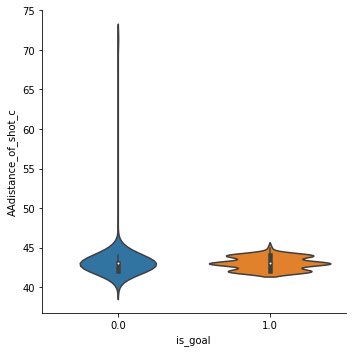

In [674]:
def plot_violin(df , cols , col2):
    shot_basics = cols
    for shot_basic in shot_basics :
        df1 = df[df['shot_basics'] == shot_basic]
        print("*******{}***********".format(shot_basic))
        sns.catplot(x="is_goal", y= col2, kind="violin", data=df1);
        plt.show()
        
shot_basics = ['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot',
           'Right Corner', 'Mid Ground Line', 'Left Corner']
plot_violin(df , shot_basics , 'AAdistance_of_shot_c')

### These should rather be fixed using xy 

In [675]:
# def shot_basics(row) :
#     data_act = row['shot_basics']
#     curr = row['AAdistance_of_shot_c']
#     if data_act != data_act :
#         #print("*")
#         if curr <= 23 :
#             return 'Goal Area'
#         elif curr <= 35 :
#             return 'Goal Line'
#         elif curr <= 43 :
#             return 'Mid Range'
#         elif curr <= 45 :
#             return 'Right Corner'
#         elif curr <= 65 :
#             return 'Penalty spot'
#         else :
#             return 'Mid Ground Line'
#     else :
#         return data_act
        
# def dist_of_shot(row) :
#     curr = row['shot_basics']
#     dist = row['AAdistance_of_shot_c']
#     if np.isnan(dist)  :
#         if curr == 'Goal Area' :
#             return 20
#         elif curr == 'Goal Line' :
#             return 
#         elif curr == 'Mid Range':
#             return 36
#         elif curr == 'Right Corner' :
#             return 43
#         elif curr == 'Left Corner' :
#             return 43

#         elif curr == 'Penalty spot' :
#             return 46
#         else :
#             return 76
#     else :
#         return dist

In [676]:
# df['XX_shot_basics'] = np.where(df['shot_basics'] != df['shot_basics'] , 1 , 0)
# df['XX_distance_of_shot'] = np.where(np.isnan(df['AAdistance_of_shot_c']) , 1 , 0)

In [677]:
# df['shot_basics'] = df.apply(shot_basics ,axis = 1)
# df['distance_of_shot'] = df.apply(dist_of_shot ,axis = 1)

In [678]:
#df[]

In [679]:
merged = df.groupby(['shot_basics']).mean()
merged

,Unnamed: 0,match_event_id,location_x,location_y,is_goal,shot_id_number,match_id,team_id,AAdistance_of_shot_c,AAremaining_min_clean,AAremaining_sec_c,AAknockout_match,AApower_of_shot
shot_basics,,,,,,,,,,,,,
Goal Area,15012.859732,243.413138,0.330081,3.097035,0.618073,15016.801464,2.491604e+07,1.610613e+09,20.767638,4.851841,28.827591,2.469950,3.010898
Goal Line,15909.113610,246.772419,4.951632,70.000241,0.453485,15930.898885,2.520491e+07,1.610613e+09,28.456548,4.998138,29.098349,2.501329,3.146178
Left Corner,15895.925373,291.814961,-231.225108,20.520000,0.365741,15966.777344,2.410613e+07,1.610613e+09,43.115356,4.202247,26.716418,2.792000,3.081654
Mid Ground Line,15129.686567,240.461538,-10.603448,492.281250,0.017544,14734.683333,2.639006e+07,1.610613e+09,76.939394,0.029851,0.344262,1.968254,3.214328
Mid Range,15032.595567,236.762979,12.834693,96.815655,0.406092,15057.671178,2.471154e+07,1.610613e+09,36.765070,5.245953,28.736753,2.458454,3.044506
Penalty Spot,16033.128547,281.841173,3.687832,211.219604,0.334040,16079.698196,2.447774e+07,1.610613e+09,45.606575,4.116138,27.225371,2.701872,3.297847
Right Corner,15681.247956,278.476744,230.586957,18.671429,0.334437,15820.214085,2.391062e+07,1.610613e+09,42.911846,4.479224,27.736842,2.663793,3.034849


In [680]:
#df = df.drop(['AAdistance_of_shot_c'] , axis = 1)

In [681]:
def show_missing() :
    df_train = df
    total = df_train.isnull().sum().sort_values(ascending=False)
    percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data.head(20))

In [682]:
df['dist_to_goal'] = pow((df['location_x']**2 + df['location_y']**2) , 0.5)

# merged = df.groupby(['range_of_shot'])['dist_to_goal'].min().astype(int) - df.groupby(['range_of_shot'])['dist_to_goal'].max().astype(int)
# merged
merged = df.groupby(['range_of_shot']).mean() 
merged

,Unnamed: 0,match_event_id,location_x,location_y,is_goal,shot_id_number,match_id,team_id,AAdistance_of_shot_c,AAremaining_min_clean,AAremaining_sec_c,AAknockout_match,AApower_of_shot,dist_to_goal
range_of_shot,,,,,,,,,,,,,,
16-24 ft.,14667.106564,237.483376,13.894793,122.407779,0.400643,14676.842855,2.442598e+07,1.610613e+09,38.721709,5.284209,28.678970,2.468405,3.088907,190.385064
24+ ft.,16031.637359,283.608411,7.085368,190.350877,0.331720,16071.149495,2.440757e+07,1.610613e+09,45.296641,4.141445,27.318058,2.714260,3.276364,257.335590
8-16 ft.,15712.897297,238.626256,8.261233,63.984729,0.435185,15774.577219,2.510845e+07,1.610613e+09,32.238022,5.147660,28.922036,2.452449,3.087676,124.965870
Back Court Shot,14779.444444,239.545455,-3.914286,475.777778,0.014286,14426.229730,2.596843e+07,1.610613e+09,74.712500,0.024691,0.283784,2.000000,3.016790,490.315603
Less Than 8 ft.,15294.065711,244.864609,1.118263,12.795337,0.573896,15282.634709,2.508497e+07,1.610613e+09,22.034366,4.873951,28.981645,2.483453,3.006896,19.184606


## Negative values are also there , replace them with nans

In [683]:
dictt_range = merged['AAdistance_of_shot_c'].to_dict()
sorted(dictt_range.items())

[('16-24 ft.', 38.721708826901036),
 ('24+ ft.', 45.296641298833066),
 ('8-16 ft.', 32.2380223570744),
 ('Back Court Shot', 74.7125),
 ('Less Than 8 ft.', 22.03436643797096)]

*******Mid Range***********


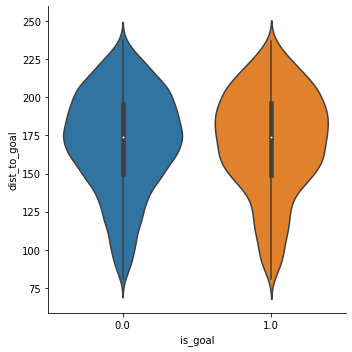

*******Goal Area***********


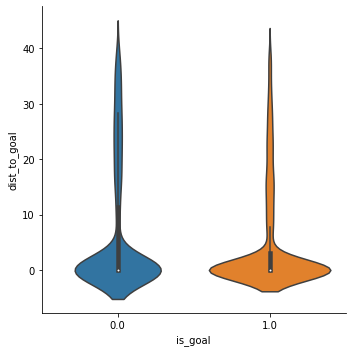

*******Goal Line***********


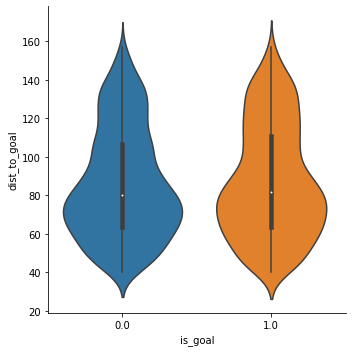

*******Penalty Spot***********


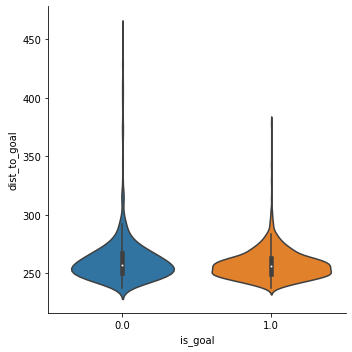

*******Right Corner***********


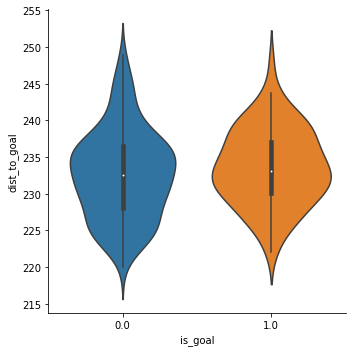

*******Mid Ground Line***********


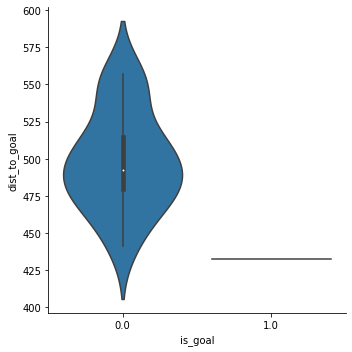

*******Left Corner***********


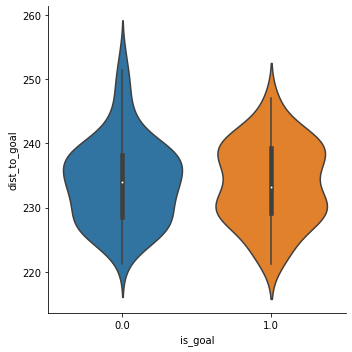

In [684]:
np.nanquantile(df['dist_to_goal'] , 0.005) , np.nanquantile(df['dist_to_goal'] , 0.995)

#sns.catplot(x="is_goal", y="dist_to_goal", kind="violin", data=df);
plot_violin(df , df['shot_basics'].dropna().unique() , 'dist_to_goal')


In [685]:
def range_of_shot(row):
    curr = row['range_of_shot']
    y = row['AAdistance_of_shot_c']
    if curr != curr :
        if y <= 28 :
            return 'Less Than 8 ft.'
        if y <= 36 :
            return '8-16 ft.'
        if y <= 43 :
            return '16-24 ft.'
        if y <= 65 :
            return  '24+ ft.'
        else :
            return 'Back Court Shot'
    else :
        return curr

def AAdistance_of_shot_c(row):
    range_shot = row['AAdistance_of_shot_c']
    if range_shot != range_shot :
        try :
            return dictt_range[row['range_of_shot']]
        except :
            return np.nan
    else :
        return range_shot
    
    
df['XXrange_of_shot'] = np.where(df['range_of_shot'] != df['range_of_shot'] , 1 ,0)   
df['XXAAdistance_of_shot_c'] = np.where(df['AAdistance_of_shot_c'] != df['AAdistance_of_shot_c'] , 1 , 0)  
df['AAdistance_of_shot_c'] = df.apply(AAdistance_of_shot_c , axis = 1)
df['range_of_shot'] = df.apply(range_of_shot , axis = 1)


In [686]:
df.head()

,Unnamed: 0,match_event_id,location_x,location_y,game_season,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,...,AAremaining_min_clean,AAtype_of_shot,AAremaining_sec_c,AAknockout_match,AApower_of_shot,home,away,dist_to_goal,XXrange_of_shot,XXAAdistance_of_shot_c
0,0,10.0,167.0,72.0,2000-01,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,...,10.0,shot - 30,27.0,1.0,1.0,MANU,POR,181.859836,0,0
1,1,12.0,-157.0,0.0,2000-01,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,...,10.0,shot - 45,22.0,1.0,1.0,MANU,POR,157.000000,0,0
2,2,35.0,-101.0,135.0,2000-01,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,...,7.0,shot - 25,45.0,1.0,1.0,NaN,NaN,168.600119,0,0
3,3,43.0,138.0,175.0,2000-01,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,...,6.0,shot - 3,52.0,1.0,1.0,MANU,POR,222.865430,0,0
4,4,155.0,0.0,0.0,2000-01,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,...,NaN,shot - 1,19.0,2.0,2.0,MANU,POR,0.000000,0,0


In [687]:
df['AArem_time'] = df['AAremaining_min_clean'].astype(float)*60 + df['AAremaining_sec_c'].astype(float)

In [688]:
df.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'game_season', 'is_goal', 'area_of_shot', 'shot_basics',
       'range_of_shot', 'team_name', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'match_id', 'team_id',
       'AAdistance_of_shot_c', 'AAremaining_min_clean', 'AAtype_of_shot',
       'AAremaining_sec_c', 'AAknockout_match', 'AApower_of_shot', 'home',
       'away', 'dist_to_goal', 'XXrange_of_shot', 'XXAAdistance_of_shot_c',
       'AArem_time'],
      dtype='object')

In [689]:
# p = df['lat/lng'].str.split(', ', expand=True)

# df['lat'] = p[0].ffill()
# df['lng'] = p[1].ffill()

In [690]:
df['date_of_game'] = df['date_of_game'].ffill()
df['home'] = df['home'].ffill()
df['away'] = df['away'].ffill()


In [691]:
df['lat/lng'] = df['lat/lng'].ffill()

In [692]:
show_missing()

                       Total   Percent
is_goal                 6268  0.204189
dist_to_goal            3030  0.098707
location_y              1597  0.052025
shot_basics             1575  0.051308
match_event_id          1563  0.050917
shot_id_number          1563  0.050917
team_name               1535  0.050005
location_x              1516  0.049386
area_of_shot            1502  0.048930
home/away               1497  0.048767
AAknockout_match        1486  0.048409
AArem_time               747  0.024335
AAremaining_min_clean    383  0.012477
AAremaining_sec_c        369  0.012021
AApower_of_shot           70  0.002280
AAdistance_of_shot_c      13  0.000423
game_season                0  0.000000
range_of_shot              0  0.000000
lat/lng                    0  0.000000
date_of_game               0  0.000000


### Fixing area of shot

In [693]:
df['area_of_shot'].unique()

array(['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)',
       'Right Side Center(RC)', 'Center(C)', nan, 'Mid Ground(MG)'],
      dtype=object)

********Right Side(R)********
********Left Side(L)********
********Left Side Center(LC)********
********Right Side Center(RC)********
********Center(C)********
********Mid Ground(MG)********


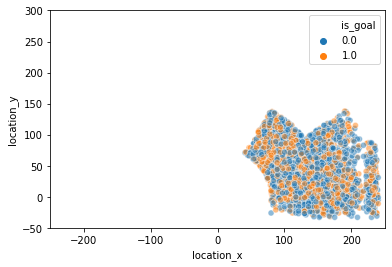

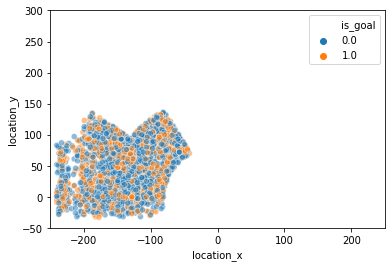

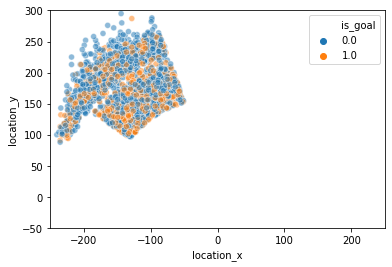

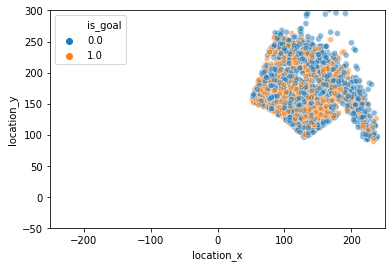

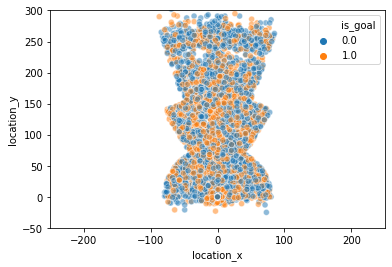

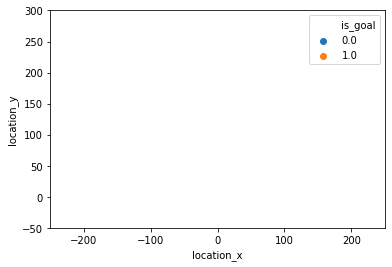

In [694]:
def plot_scatter(df , categories , compare_with) :
    for i in categories :
        print("********{}********".format(i))
        #print(lst[i].head())
        df1 = df[df[compare_with] == i]
        plt.figure()
        ax = sns.scatterplot(x="location_x", y="location_y", hue = 'is_goal' , data= df1 , alpha = 0.5)
        ax.set_ylim(-50 , 300)
        ax.set_xlim(-250 , 250)
plot_scatter(df ,['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)',
       'Right Side Center(RC)', 'Center(C)', 'Mid Ground(MG)'], 'area_of_shot')    

In [695]:
merged = df.groupby('area_of_shot').min()
merged

,Unnamed: 0,match_event_id,location_x,location_y,game_season,is_goal,range_of_shot,date_of_game,shot_id_number,lat/lng,...,AAtype_of_shot,AAremaining_sec_c,AAknockout_match,AApower_of_shot,home,away,dist_to_goal,XXrange_of_shot,XXAAdistance_of_shot_c,AArem_time
area_of_shot,,,,,,,,,,,,,,,,,,,,,
Center(C),4,2.0,-98.0,-25.0,1996-97,0.0,16-24 ft.,1996-11-06,5.0,"25.790710, -80.207819",...,shot - 0,0.0,1.0,1.0,MANU,ATL,0.000000,0,0,0.0
Left Side Center(LC),2,2.0,-240.0,88.0,1996-97,0.0,16-24 ft.,1996-11-03,3.0,"25.790710, -80.207819",...,shot - 0,0.0,1.0,1.0,MANU,ATL,160.078106,0,0,0.0
Left Side(L),1,2.0,-240.0,-33.0,1996-97,0.0,16-24 ft.,1996-11-15,2.0,"25.790710, -80.207819",...,shot - 0,0.0,1.0,1.0,MANU,ATL,80.006250,0,0,0.0
Mid Ground(MG),177,97.0,-223.0,398.0,1996-97,0.0,Back Court Shot,1997-05-04,178.0,"29.444994, -98.524120",...,shot - 0,0.0,1.0,1.0,MANU,ATL,406.315149,0,0,0.0
Right Side Center(RC),3,2.0,51.0,89.0,1996-97,0.0,16-24 ft.,1996-11-08,4.0,"25.790710, -80.207819",...,shot - 0,0.0,1.0,1.0,MANU,ATL,160.015624,0,0,0.0
Right Side(R),0,2.0,41.0,-33.0,1996-97,0.0,16-24 ft.,1996-11-12,1.0,"25.790710, -80.207819",...,shot - 0,0.0,1.0,1.0,MANU,ATL,80.056230,0,0,0.0


In [696]:
dictt_range = merged['location_y'].to_dict()
dictt_range

{'Center(C)': -25.0,
 'Left Side Center(LC)': 88.0,
 'Left Side(L)': -33.0,
 'Mid Ground(MG)': 398.0,
 'Right Side Center(RC)': 89.0,
 'Right Side(R)': -33.0}

In [697]:
def area_of_shot(row):
    curr = row['area_of_shot']
    y = row['location_y']
    if curr != curr :
        if row['location_x'] < 75 and row['location_x'] > -75 and y < 150:
            return 'Center(C)'
        if row['location_x'] < 75 and row['location_x'] > -75 and y > 175:
            return 'Center Far(CF)'
        if y <= 130 and row['location_x'] < -75:
            return 'Left Side(L)'
        if y <= 130 and row['location_x'] > 75:
            return 'Right Side(R)'
#         if y <= 180 :
#             return '16-24 ft.'
        if y > 300 :
            return  'Mid Ground(MG)'
        else :
            if row['location_x'] < 0 :
                return 'Left Side Center(LC)'
            else :
                return 'Right Side Center(RC)'

    else :
        if row['location_x'] < 75 and row['location_x'] > - 75 and y > 175:
            return 'Center Far(CF)'
        else :
            return curr
        

    
df['XXarea_of_shot'] = np.where(df['area_of_shot'] != df['area_of_shot'] , 1 ,0)   
df['area_of_shot'] = df.apply(area_of_shot , axis = 1)


In [698]:
merged = df.groupby('area_of_shot').mean()
merged

dictt_range_X = merged['location_x'].to_dict()
dictt_range_Y = merged['location_y'].to_dict()
dictt_range

{'Center(C)': -25.0,
 'Left Side Center(LC)': 88.0,
 'Left Side(L)': -33.0,
 'Mid Ground(MG)': 398.0,
 'Right Side Center(RC)': 89.0,
 'Right Side(R)': -33.0}

In [699]:
def location_X(row) :
    curr = row['location_x']
    if curr != curr :
        try :
            return dictt_range_X[row['area_of_shot']]
        except:
            return np.nan
    else :
        return curr
    
def location_Y(row) :
    curr = row['location_y']
    if curr != curr :
        try :
            return dictt_range_Y[row['area_of_shot']]
        except :
            return np.nan
    else :
        return curr


In [700]:
df['XXlocation_y'] = np.where(df['location_y'] != df['location_y'] , 1 ,0)   
df['location_y'] = df.apply(location_Y , axis = 1)

df['XXlocation_x'] = np.where(df['location_x'] != df['location_x'] , 1 ,0)   
df['location_x'] = df.apply(location_X , axis = 1)


In [701]:
#df = df.drop(['dist_to_goal'] , axis = 1)
show_missing()

                       Total   Percent
is_goal                 6268  0.204189
dist_to_goal            3030  0.098707
shot_basics             1575  0.051308
match_event_id          1563  0.050917
shot_id_number          1563  0.050917
team_name               1535  0.050005
home/away               1497  0.048767
AAknockout_match        1486  0.048409
AArem_time               747  0.024335
AAremaining_min_clean    383  0.012477
AAremaining_sec_c        369  0.012021
AApower_of_shot           70  0.002280
AAdistance_of_shot_c      13  0.000423
game_season                0  0.000000
date_of_game               0  0.000000
area_of_shot               0  0.000000
location_y                 0  0.000000
range_of_shot              0  0.000000
location_x                 0  0.000000
XXlocation_x               0  0.000000


### FIxing shot basics

********Mid Range********
********Goal Area********
********Goal Line********
********Penalty Spot********
********Right Corner********
********Mid Ground Line********
********Left Corner********


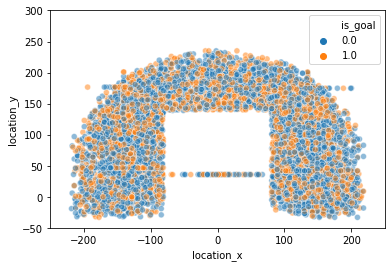

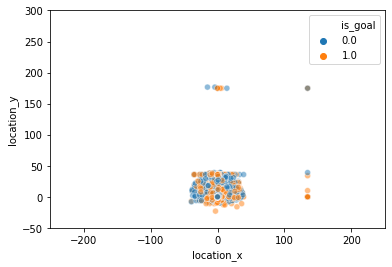

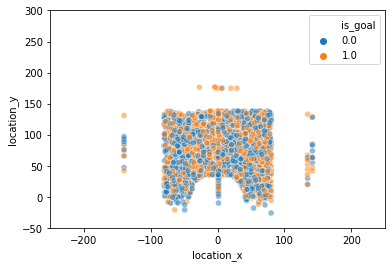

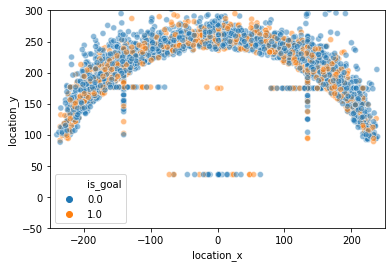

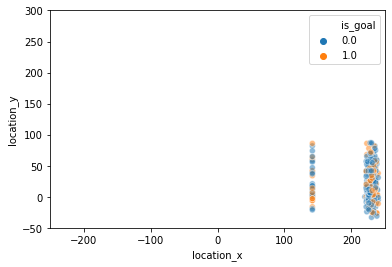

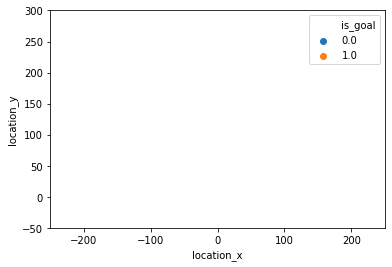

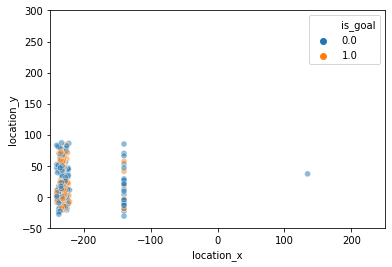

In [702]:
df['shot_basics'].unique()
plot_scatter(df ,['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot',
       'Right Corner', 'Mid Ground Line', 'Left Corner'], 'shot_basics')    

In [703]:
#merged = df.groupby('yr').mean()
#merged

In [704]:
dictt_range = merged['is_goal'].to_dict()
dictt_range

# d = dictt_range
# sorted( ((v,k) for k,v in d.items()), reverse=True)

{'Center Far(CF)': 0.3662906436629064,
 'Center(C)': 0.5490850376749192,
 'Left Side Center(LC)': 0.36354961832061067,
 'Left Side(L)': 0.39326599326599326,
 'Mid Ground(MG)': 0.0,
 'Right Side Center(RC)': 0.38587675218196243,
 'Right Side(R)': 0.3961904761904762}

In [705]:
#d = { "a":4, "c":3, "b":12 }
d_view = [ (v,k) for k,v in d.items() ]
d_view.sort(reverse=True) # natively sort tuples by first element
for v,k in d_view:
    print ("'%s'," %(k))

'2007-08',
'2000-01',
'2008-09',
'1998-99',
'1999-00',
'2012-13',
'2001-02',
'2006-07',
'2009-10',
'2005-06',
'2010-11',
'2002-03',
'2004-05',
'2003-04',
'1997-98',
'1996-97',
'2011-12',
'2013-14',
'2014-15',
'2015-16',


In [706]:
def shot_basics(row) :
    curr = row['shot_basics']
    data_act = curr
    y = row['location_y']
    x = row['location_x']
    #print("*")
    if y < 50 and x > -40 and x < 40 :
        return 'Goal Area'
    elif y < 140 and x > -90 and x < 90 :
        return 'Goal Line'
    elif row['dist_to_goal'] > 230  and  row['dist_to_goal'] < 300 and y > 90:
        return 'Penalty Spot'
    elif x > 200 :
        return 'Right Corner'
    elif x < -200 :
        return 'Left Corner'
    elif y > 300 :
        return 'Mid Ground Line'
    else :
        return 'Mid Range'


In [707]:
df['XX_shot_basics'] = np.where(df['shot_basics'] != df['shot_basics'] , 1 ,0)   
df['shot_basics'] = df.apply(shot_basics , axis = 1)

#df['XX_shot_basics'] = np.where(df['shot_basics'] != df['shot_basics'] , 1 , 0)
df['XX_distance_of_shot'] = np.where(np.isnan(df['AAdistance_of_shot_c']) , 1 , 0)

In [708]:
merged = df.groupby('shot_basics').mean()
merged

dictt_range = merged['location_y'].to_dict()
dictt_range

{'Goal Area': 7.376054241148245,
 'Goal Line': 71.51147454452055,
 'Left Corner': 39.38943127168394,
 'Mid Ground Line': 409.496644295302,
 'Mid Range': 101.42603815534562,
 'Penalty Spot': 207.76329735034346,
 'Right Corner': 29.853073441141838}

********Mid Range********
********Goal Area********
********Goal Line********
********Penalty Spot********
********Right Corner********
********Mid Ground Line********
********Left Corner********


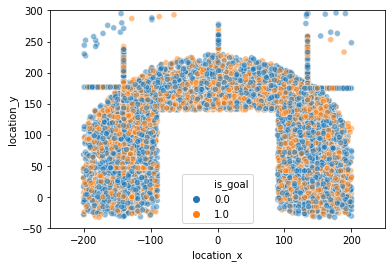

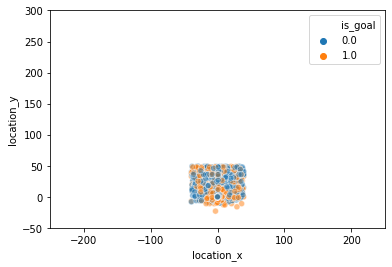

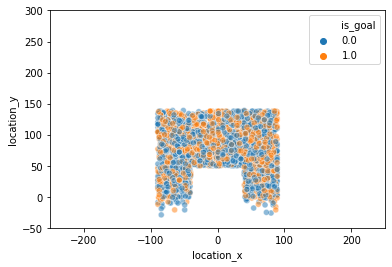

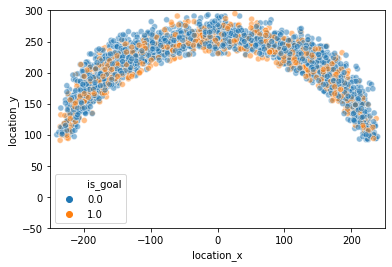

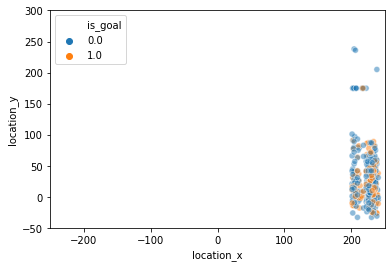

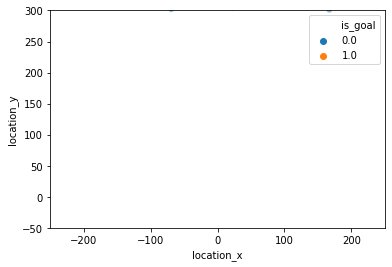

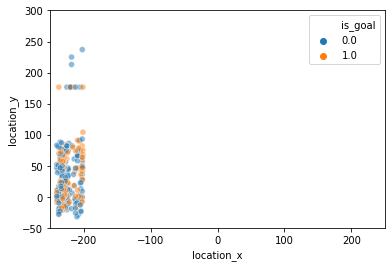

In [709]:
df['shot_basics'].unique()
plot_scatter(df ,['Mid Range', 'Goal Area', 'Goal Line', 'Penalty Spot',
       'Right Corner', 'Mid Ground Line', 'Left Corner'], 'shot_basics')    

In [710]:
show_missing()

                       Total   Percent
is_goal                 6268  0.204189
dist_to_goal            3030  0.098707
match_event_id          1563  0.050917
shot_id_number          1563  0.050917
team_name               1535  0.050005
home/away               1497  0.048767
AAknockout_match        1486  0.048409
AArem_time               747  0.024335
AAremaining_min_clean    383  0.012477
AAremaining_sec_c        369  0.012021
AApower_of_shot           70  0.002280
AAdistance_of_shot_c      13  0.000423
shot_basics                0  0.000000
game_season                0  0.000000
range_of_shot              0  0.000000
location_y                 0  0.000000
location_x                 0  0.000000
date_of_game               0  0.000000
area_of_shot               0  0.000000
XX_distance_of_shot        0  0.000000


In [711]:
#df[df['area_of_shot'] == 'Center(C)']

In [712]:
# #plt.hist(df[df['area_of_shot'] == 'Center(C)']['location_y'] , bins = 12)
# sns.set()
# lst = []
# #cols =['Center(C)', 'Left Side Center(LC)', 'Left Side(L)', 'Mid Ground(MG)', 'Right Side Center(RC)', 'Right Side(R)']
# cols =['Less Than 8 ft.', '8-16 ft.', '16-24 ft.', '24+ ft.',
#        'Back Court Shot']
# for col in cols :
#     lst.append(df[df['range_of_shot'] == col])

# # for col in cols :
# #     lst.append(df[df['range_of_shot'] == col])

# # lst.append(df[df['area_of_shot'] == 'Center(C)'])
# # lst.append(df[df['area_of_shot'] == 'Left Side(L)'])
# # lst.append(df[df['area_of_shot'] == 'Right Side(R)'])
# # lst[0].head()


In [713]:
df['range_of_shot'].dropna().unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

********16-24 ft.********
********8-16 ft.********
********Less Than 8 ft.********
********24+ ft.********
********Back Court Shot********


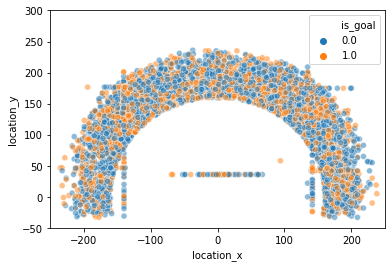

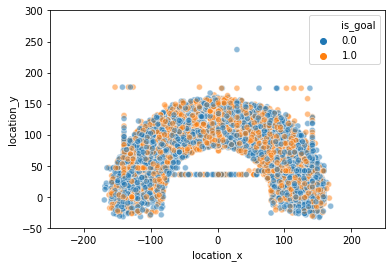

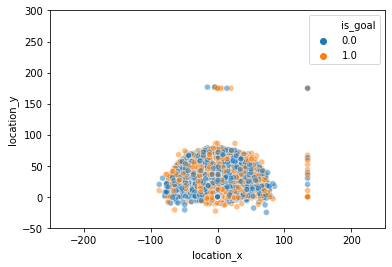

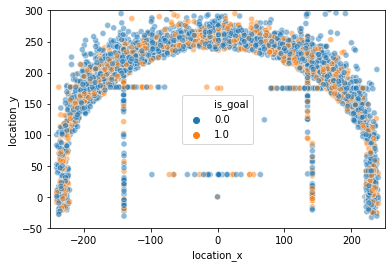

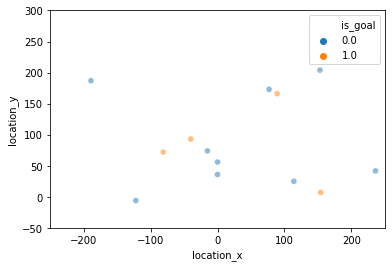

In [714]:
    
plot_scatter(df , ['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], 'range_of_shot')    

In [715]:
# plt.figure(figsize=(15,8))
# ax = sns.scatterplot(x="location_x", y="location_y", hue = 'is_goal' , data= df , alpha = 0.3)


In [716]:
# for i in range(len(lst)) :
#     print(lst[i].head())
#     plt.plot(x=lst[i]["location_x"], y=lst[i]["location_y"])

# plt.show()

In [717]:
# merged = df.groupby('area_of_shot').mean()
# merged

In [718]:
# show_missing()

In [719]:
# df.columns

In [720]:
p = df['home/away'].str.split(expand=True)
df = df.drop(['home/away'] , axis = 1)
df['home'] = p[0].ffill()
df['away'] = p[2].ffill()

In [721]:
df['shot_id_number'] = df['Unnamed: 0'].astype(int) + 1
#df['knockout_match'] = df['knockout_match'].ffill()
#df = df.drop(['team_name' , 'AAremaining_min_clean' , 'AAremaining_sec_c'] , axis = 1)

In [722]:
df

,Unnamed: 0,match_event_id,location_x,location_y,game_season,is_goal,area_of_shot,shot_basics,range_of_shot,team_name,...,away,dist_to_goal,XXrange_of_shot,XXAAdistance_of_shot_c,AArem_time,XXarea_of_shot,XXlocation_y,XXlocation_x,XX_shot_basics,XX_distance_of_shot
0,0,10.0,167.000000,72.000000,2000-01,NaN,Right Side(R),Mid Range,16-24 ft.,Manchester United,...,POR,181.859836,0,0,627.0,0,0,0,0,0
1,1,12.0,-157.000000,0.000000,2000-01,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,...,POR,157.000000,0,0,622.0,0,0,0,0,0
2,2,35.0,-101.000000,135.000000,2000-01,1.0,Left Side Center(LC),Mid Range,16-24 ft.,Manchester United,...,POR,168.600119,0,0,465.0,0,0,0,0,0
3,3,43.0,138.000000,175.000000,2000-01,0.0,Right Side Center(RC),Mid Range,16-24 ft.,Manchester United,...,POR,222.865430,0,0,412.0,0,0,0,0,0
4,4,155.0,0.000000,0.000000,2000-01,1.0,Center(C),Goal Area,Less Than 8 ft.,NaN,...,POR,0.000000,0,0,NaN,0,0,0,0,0
5,5,244.0,-145.000000,-11.000000,2000-01,0.0,Left Side(L),Mid Range,8-16 ft.,Manchester United,...,POR,145.416643,0,0,572.0,0,0,0,0,0
6,6,251.0,0.000000,0.000000,2000-01,1.0,Center(C),Goal Area,Less Than 8 ft.,Manchester United,...,POR,0.000000,0,0,532.0,0,0,0,0,0
7,7,254.0,1.000000,28.000000,2000-01,NaN,Center(C),Goal Area,Less Than 8 ft.,Manchester United,...,POR,28.017851,0,0,485.0,0,0,0,0,0
8,8,265.0,-65.000000,46.661368,2000-01,1.0,Left Side(L),Goal Line,8-16 ft.,Manchester United,...,POR,NaN,0,0,372.0,0,1,0,0,0
9,9,294.0,-33.000000,35.855607,2000-01,0.0,Center(C),Goal Area,8-16 ft.,Manchester United,...,POR,NaN,0,0,216.0,0,1,0,0,0


In [723]:
df['match_event_id'].value_counts()
#df['match_event_id'] = df['match_event_id'].fillna(df['match_event_id'].mean())
#np.where(df['match_event_id'] != df['match_event_id'] , -999 ,df['match_event_id'] )
rem_mean = np.median(df['AArem_time'])
df['AArem_time'] = df['AArem_time'].fillna(df['AArem_time'].mean())
df['location_x'] = df['location_x'].fillna(df['location_x'].median())
df['location_y'] = df['location_y'].fillna(df['location_y'].median())
df['dist_to_goal'] = df['dist_to_goal'].fillna(df['dist_to_goal'].median())
df['AAdistance_of_shot_c'] = df['AAdistance_of_shot_c'].fillna(df['AAdistance_of_shot_c'].median())

df['XXrem_sec'] = np.where(df['AAremaining_sec_c'] != df['AAremaining_sec_c'] , 1 , 0)
df['AAremaining_sec_c'] = df['AAremaining_sec_c'].fillna(df['AAremaining_sec_c'].median())

df['XXrem_min'] = np.where(df['AAremaining_min_clean'] != df['AAremaining_min_clean'] , 1 , 0)
df['AAremaining_min_clean'] = df['AAremaining_min_clean'].fillna(df['AAremaining_min_clean'].median())

df['XXpower'] = np.where(df['AApower_of_shot'] != df['AApower_of_shot'] , 1 , 0)
df['AApower_of_shot'] = df['AApower_of_shot'].fillna(df['AApower_of_shot'].median())

df['match_event_id'] = df['match_event_id'].fillna(1.0)
df['date_of_game'] = df['date_of_game'].ffill()
#df['team_name'] = df['team_name'].fillna(df['team_name'].median())

In [724]:
df = df.drop(['team_name'] , axis = 1)

In [725]:
df['yr'] , df['mo'] , x = df['date_of_game'].str.split('-').str
df['yrbuck'] = np.where(df['yr'] != df['yr'] , df['yr'].median() , df['yr'])
df['yrbuck'] = df.apply(lambda row : int((int(row.yr) - 1996)/3) , axis = 1)

In [726]:
#df = df.drop(['AAremaining_sec_c',
#"AAremaining_min_clean"] , axis = 1)

In [727]:
show_missing()

                       Total   Percent
is_goal                 6268  0.204189
AAknockout_match        1486  0.048409
date_of_game               0  0.000000
AAremaining_min_clean      0  0.000000
AAdistance_of_shot_c       0  0.000000
team_id                    0  0.000000
match_id                   0  0.000000
lat/lng                    0  0.000000
shot_id_number             0  0.000000
range_of_shot              0  0.000000
AAremaining_sec_c          0  0.000000
shot_basics                0  0.000000
area_of_shot               0  0.000000
game_season                0  0.000000
location_y                 0  0.000000
location_x                 0  0.000000
match_event_id             0  0.000000
AAtype_of_shot             0  0.000000
yrbuck                     0  0.000000
mo                         0  0.000000


In [728]:
df['lat/lng'].value_counts()
home_xy = '42.982923, -71.446094'
df['home_stadium'] = np.where(df['lat/lng'] == home_xy , 1 , 0)

In [729]:
df

,Unnamed: 0,match_event_id,location_x,location_y,game_season,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,...,XXlocation_x,XX_shot_basics,XX_distance_of_shot,XXrem_sec,XXrem_min,XXpower,yr,mo,yrbuck,home_stadium
0,0,10.0,167.000000,72.000000,2000-01,NaN,Right Side(R),Mid Range,16-24 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
1,1,12.0,-157.000000,0.000000,2000-01,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
2,2,35.0,-101.000000,135.000000,2000-01,1.0,Left Side Center(LC),Mid Range,16-24 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
3,3,43.0,138.000000,175.000000,2000-01,0.0,Right Side Center(RC),Mid Range,16-24 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
4,4,155.0,0.000000,0.000000,2000-01,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,...,0,0,0,0,1,0,2000,10,1,0
5,5,244.0,-145.000000,-11.000000,2000-01,0.0,Left Side(L),Mid Range,8-16 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
6,6,251.0,0.000000,0.000000,2000-01,1.0,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
7,7,254.0,1.000000,28.000000,2000-01,NaN,Center(C),Goal Area,Less Than 8 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
8,8,265.0,-65.000000,46.661368,2000-01,1.0,Left Side(L),Goal Line,8-16 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0
9,9,294.0,-33.000000,35.855607,2000-01,0.0,Center(C),Goal Area,8-16 ft.,2000-10-31,...,0,0,0,0,0,0,2000,10,1,0


# TODO : Creating buckets

In [730]:
#df['match_id'].unique()
#pd.cut(df['AArem_time'], 20)

In [731]:
#merged = df.groupby(['AAtype_of_shot']).mean()
#merged = df.groupby(['game_season']).mean()
merged = df.groupby(['match_event_id']).mean()
merged

,Unnamed: 0,location_x,location_y,is_goal,shot_id_number,match_id,team_id,AAdistance_of_shot_c,AAremaining_min_clean,AAremaining_sec_c,...,XXarea_of_shot,XXlocation_y,XXlocation_x,XX_shot_basics,XX_distance_of_shot,XXrem_sec,XXrem_min,XXpower,yrbuck,home_stadium
match_event_id,,,,,,,,,,,,,,,,,,,,,
1.0,15429.661548,7.959986,86.799820,0.442742,15430.661548,2.482562e+07,1.610613e+09,33.128939,4.937300,28.500320,...,0.043506,0.051823,0.045425,0.051184,0.000640,0.012796,0.012796,0.001280,3.009597,0.494562
2.0,15072.718750,-11.430013,111.708712,0.510204,15073.718750,2.421069e+07,1.610613e+09,35.729687,11.000000,42.000000,...,0.062500,0.039062,0.023438,0.070312,0.000000,0.023438,0.000000,0.000000,3.296875,0.546875
3.0,15204.000000,8.873861,99.129630,0.357143,15205.000000,2.382273e+07,1.610613e+09,35.574074,11.000000,31.870370,...,0.018519,0.000000,0.037037,0.037037,0.000000,0.037037,0.000000,0.000000,3.481481,0.481481
4.0,14523.225490,23.670869,113.283200,0.307692,14524.225490,2.359366e+07,1.610613e+09,36.931373,10.990196,24.794118,...,0.029412,0.098039,0.029412,0.029412,0.000000,0.019608,0.000000,0.000000,3.392157,0.470588
5.0,15958.222222,15.994543,105.641746,0.431373,15959.222222,2.358776e+07,1.610613e+09,35.682540,10.761905,18.603175,...,0.047619,0.031746,0.063492,0.111111,0.000000,0.000000,0.031746,0.000000,3.571429,0.492063
6.0,15983.976471,13.544261,83.476387,0.442857,15984.976471,2.632757e+07,1.610613e+09,33.223529,10.611765,23.282353,...,0.035294,0.082353,0.070588,0.023529,0.000000,0.000000,0.023529,0.011765,3.141176,0.388235
7.0,14674.197368,-13.477457,97.946859,0.467742,14675.197368,2.405320e+07,1.610613e+09,34.781579,10.552632,26.578947,...,0.039474,0.065789,0.052632,0.065789,0.000000,0.000000,0.000000,0.000000,2.921053,0.513158
8.0,14853.160920,7.667674,83.614522,0.458333,14854.160920,2.456614e+07,1.610613e+09,33.797701,10.356322,30.068966,...,0.022989,0.068966,0.022989,0.034483,0.000000,0.022989,0.000000,0.000000,3.057471,0.494253
9.0,15299.419753,16.745328,103.421497,0.439394,15300.419753,2.371544e+07,1.610613e+09,34.086420,10.172840,28.839506,...,0.049383,0.049383,0.037037,0.037037,0.000000,0.037037,0.012346,0.024691,3.308642,0.493827


In [732]:
dictt = merged['is_goal'].to_dict()

In [733]:
import collections
sorted_x = sorted(dictt.items(), key=lambda kv: kv[1])
sorted_dict = collections.OrderedDict(sorted_x)
sorted_dict.keys()

odict_keys([559.0, 567.0, 575.0, 579.0, 580.0, 583.0, 564.0, 562.0, 566.0, 570.0, 571.0, 548.0, 553.0, 558.0, 572.0, 576.0, 578.0, 551.0, 560.0, 549.0, 552.0, 554.0, 569.0, 574.0, 577.0, 582.0, 585.0, 547.0, 556.0, 557.0, 563.0, 584.0, 555.0, 565.0, 568.0, 561.0, 550.0, 573.0, 581.0, 586.0, 587.0, 589.0, 591.0, 593.0, 595.0, 598.0, 606.0, 607.0, 610.0, 612.0, 617.0, 620.0, 623.0, 625.0, 639.0, 653.0, 526.0, 518.0, 527.0, 543.0, 504.0, 528.0, 513.0, 189.0, 486.0, 532.0, 542.0, 480.0, 478.0, 374.0, 476.0, 89.0, 447.0, 287.0, 216.0, 473.0, 482.0, 533.0, 537.0, 450.0, 452.0, 145.0, 529.0, 136.0, 122.0, 388.0, 538.0, 540.0, 157.0, 223.0, 436.0, 4.0, 524.0, 188.0, 107.0, 493.0, 516.0, 243.0, 144.0, 441.0, 460.0, 310.0, 423.0, 457.0, 51.0, 260.0, 390.0, 440.0, 481.0, 488.0, 514.0, 539.0, 592.0, 10.0, 71.0, 320.0, 347.0, 254.0, 367.0, 462.0, 114.0, 365.0, 503.0, 127.0, 148.0, 201.0, 161.0, 357.0, 413.0, 445.0, 230.0, 501.0, 244.0, 431.0, 353.0, 451.0, 512.0, 515.0, 271.0, 3.0, 461.0, 483.0, 53

In [734]:
df.to_csv('my_csv_final2.csv')

# NOW DOING MEAN ENCODINGS[](http://)

In [735]:
#df1['item_target_enc'] = all_data.groupby('item_id')['target'].transform('mean')


In [736]:
df.describe()

,Unnamed: 0,match_event_id,location_x,location_y,is_goal,shot_id_number,match_id,team_id,AAdistance_of_shot_c,AAremaining_min_clean,...,XXarea_of_shot,XXlocation_y,XXlocation_x,XX_shot_basics,XX_distance_of_shot,XXrem_sec,XXrem_min,XXpower,yrbuck,home_stadium
count,30697.000000,30697.000000,30697.000000,30697.000000,24429.000000,30697.000000,3.069700e+04,3.069700e+04,30697.000000,30697.000000,...,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000
mean,15348.000000,236.919275,7.497733,90.707643,0.445331,15349.000000,2.476407e+07,1.610613e+09,33.651851,4.883669,...,0.048930,0.052025,0.049386,0.051308,0.000423,0.012021,0.012477,0.002280,3.026224,0.487605
std,8861.604943,156.183852,109.609548,85.724855,0.497013,8861.604943,7.755175e+06,0.000000e+00,9.800831,3.429232,...,0.215725,0.222080,0.216676,0.220629,0.020575,0.108980,0.111002,0.047699,1.609785,0.499854
min,0.000000,1.000000,-240.000000,-33.000000,0.000000,1.000000,2.000001e+07,1.610613e+09,20.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7674.000000,91.000000,-68.000000,7.000000,0.000000,7675.000000,2.050008e+07,1.610613e+09,25.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,15348.000000,242.000000,0.000000,71.000000,0.000000,15349.000000,2.090035e+07,1.610613e+09,35.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
75%,23022.000000,361.000000,97.000000,161.000000,1.000000,23023.000000,2.960047e+07,1.610613e+09,41.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000
max,30696.000000,659.000000,240.000000,564.000000,1.000000,30697.000000,4.990009e+07,1.610613e+09,97.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000


In [737]:
df[df['match_event_id'] == 15.0].describe()

,Unnamed: 0,match_event_id,location_x,location_y,is_goal,shot_id_number,match_id,team_id,AAdistance_of_shot_c,AAremaining_min_clean,...,XXarea_of_shot,XXlocation_y,XXlocation_x,XX_shot_basics,XX_distance_of_shot,XXrem_sec,XXrem_min,XXpower,yrbuck,home_stadium
count,67.000000,67.0,67.000000,67.000000,56.000000,67.000000,6.700000e+01,6.700000e+01,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.0,67.0,67.000000,67.0,67.000000,67.000000
mean,13594.388060,15.0,15.876608,95.010615,0.625000,13595.388060,2.379309e+07,1.610613e+09,32.208955,9.447761,...,0.044776,0.029851,0.044776,0.044776,0.0,0.0,0.014925,0.0,2.925373,0.447761
std,8948.256383,0.0,87.424882,84.727648,0.488504,8948.256383,6.743108e+06,0.000000e+00,9.303856,0.764429,...,0.208373,0.171460,0.208373,0.208373,0.0,0.0,0.122169,0.0,1.480309,0.501017
min,293.000000,15.0,-184.000000,-19.000000,0.000000,294.000000,2.000021e+07,1.610613e+09,20.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000
25%,7566.000000,15.0,-6.000000,0.000000,0.000000,7567.000000,2.045064e+07,1.610613e+09,21.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,2.000000,0.000000
50%,11278.000000,15.0,1.442584,76.000000,1.000000,11279.000000,2.060113e+07,1.610613e+09,34.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,3.000000,0.000000
75%,21461.000000,15.0,82.000000,179.000000,1.000000,21462.000000,2.140027e+07,1.610613e+09,40.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,4.000000,1.000000
max,29676.000000,15.0,167.000000,240.000000,1.000000,29677.000000,4.100023e+07,1.610613e+09,47.000000,10.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,6.000000,1.000000


In [738]:
#df.to_csv('../Cleaned_almost.csv')
#df = df.drop(['date_of_game'] , axis = 1)
#df = df.drop(['lat' , 'lng'] , axis = 1)
#df['item_target_enc'] = all_data.groupby('item_id')['target'].transform('mean')


In [740]:
# df['date_of_game'] = pd.to_datetime(df['date_of_game'])
# df['year'] = df['date_of_game']
#df['Year'] = df['date_of_game'].
#sample = pd.read_csv('../input/zs-sample/sample_submission.csv')
#sample.head()

In [741]:
show_missing()

                       Total   Percent
is_goal                 6268  0.204189
AAknockout_match        1486  0.048409
date_of_game               0  0.000000
AAtype_of_shot             0  0.000000
AAremaining_min_clean      0  0.000000
AAdistance_of_shot_c       0  0.000000
team_id                    0  0.000000
match_id                   0  0.000000
lat/lng                    0  0.000000
shot_id_number             0  0.000000
range_of_shot              0  0.000000
yrbuck                     0  0.000000
shot_basics                0  0.000000
area_of_shot               0  0.000000
game_season                0  0.000000
location_y                 0  0.000000
location_x                 0  0.000000
match_event_id             0  0.000000
AAremaining_sec_c          0  0.000000
home_stadium               0  0.000000


In [743]:
categorical_cols = [
        'area_of_shot', 'shot_basics',
       'range_of_shot', 
       'AAtype_of_shot', 'away',
       'XX_shot_basics', 'XX_distance_of_shot',
       'XXrange_of_shot', 'XXlocation_y', 'XXarea_of_shot']
numericals = ['location_x', 'AAdistance_of_shot_c' , 'location_y',
       'dist_to_goal' , 'AArem_time' , 'shot_id_number' , 'is_goal']

dummies = pd.get_dummies(df[categorical_cols])

df_final = pd.concat([dummies , df[numericals] ], axis = 1)
df_final.head()

,XX_shot_basics,XX_distance_of_shot,XXrange_of_shot,XXlocation_y,XXarea_of_shot,area_of_shot_Center Far(CF),area_of_shot_Center(C),area_of_shot_Left Side Center(LC),area_of_shot_Left Side(L),area_of_shot_Mid Ground(MG),...,away_UTH,away_VAN,away_WAS,location_x,AAdistance_of_shot_c,location_y,dist_to_goal,AArem_time,shot_id_number,is_goal
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,167.0,38.0,72.0,181.859836,627.000000,1,NaN
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,-157.0,35.0,0.0,157.000000,622.000000,2,0.0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,-101.0,36.0,135.0,168.600119,465.000000,3,1.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,138.0,42.0,175.0,222.865430,412.000000,4,0.0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0.0,20.0,0.0,0.000000,321.641135,5,1.0


In [744]:
#df_final.to_csv('FINAL_DF.csv')

In [ ]:
 
train_data = df_final[~(df_final['shot_id_number'].isin(sample.shot_id_number.values))]
train_data = train_data[pd.notnull(train_data['is_goal'])]
train_data = train_data[~train_data['is_goal'].isnull()]
test_data = df_final[df_final['shot_id_number'].isin(sample.shot_id_number.values)]

In [748]:
train_data['is_goal'].mean()

NameError: name 'train_data' is not defined

In [747]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

/home/nitesh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [ ]:
#train_data = train_data[::20]

train_X = train_data.drop(['is_goal'] , axis = 1)
train_y = train_data['is_goal']
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(train_X, train_y, test_size=0.33, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression(random_state=0, solver='lbfgs',
                          multi_class='multinomial').fit(X_train, y_train)

In [ ]:
y_pred1 = Logreg.predict_proba(X_test)[:,1]
#y_pred_1

In [ ]:
#print(mean_absolute_error(y_pred_1 , y_test))

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train.values, y_train)
y_pred2 = lr.predict(X_test)
y_pred2

print(mean_absolute_error((y_pred2 + y_pred1)/2 , y_test))
#pd.DataFrame(y_pred).describe()

In [ ]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
knn = KNeighborsClassifier(n_neighbors=3)
knn1 = knn.fit(X_train , y_train)
y_pred3 = knn1.predict(X_test)
print(mean_absolute_error((y_pred1 + y_pred2 + y_pred3)/3 , y_test))

In [ ]:
m2 = CatBoostClassifier()
a = m2.fit(X_train , y_train)

In [ ]:
y_pred4 = a.predict_proba(X_test)[:,1]
from sklearn.metrics import balanced_accuracy_score

print(mean_absolute_error((y_pred1 + y_pred2 + y_pred3 + y_pred4*7)/10 , y_test))
preds  = (y_pred1 + y_pred2 + y_pred3 + y_pred4*7)/10
thres = preds.mean()
thres

In [ ]:
categorical_pred = preds >= (thres ) 
categorical_pred.mean()

In [ ]:
print(balanced_accuracy_score(categorical_pred , y_test))

In [ ]:
# from sklearn.linear_model import LogisticRegression
# def find_sol(test)
#     Logreg = LogisticRegression(random_state=0, solver='lbfgs',
#                               multi_class='multinomial').fit(X_train, y_train)

#     y_pred_1 = clf.predict_proba(X_test)[:,1]
#     y_pred_1

#     print(mean_absolute_error(y_pred_1 , y_test))

#     from sklearn.linear_model import LinearRegression

#     lr = LinearRegression()
#     lr.fit(X_train.values, y_train)
#     y_pred2 = lr.predict(X_test)
#     y_pred2

#     print(mean_absolute_error((y_pred2 + y_pred1)/2 , y_test))
#     #pd.DataFrame(y_pred).describe()

#     from sklearn.neighbors import (NeighborhoodComponentsAnalysis,KNeighborsClassifier)
#     knn = KNeighborsClassifier(n_neighbors=3)
#     knn1 = knn.fit(X_train , y_train)
#     y_pred3 = knn1.predict(X_test)
#     print(mean_absolute_error((y_pred1 + y_pred2 + y_pred3)/3 , y_test))

#     m2 = CatBoostClassifier()
#     a = m2.fit(X_train , y_train)

#     y_pred4 = a.predict_proba(X_test)[:,1]
#     print(mean_absolute_error((y_pred1 + y_pred2 + y_pred3 + y_pred4*7)/10 , y_test))
test_data = test_data.drop(['is_goal'] , axis =1 )

In [ ]:
len(test_data)

In [ ]:
def solve_prob(X_test1) :
    y_pred1 = Logreg.predict_proba(X_test1)[:,1]
    y_pred2 = lr.predict(X_test1)
    y_pred3 = knn1.predict(X_test1)
    y_pred4 = a.predict_proba(X_test1)[:,1]


    final = (y_pred1 + y_pred2 + y_pred3 + y_pred4*7)/10
    preds = final > final.mean()
    return preds*1
ans = solve_prob(test_data)
ans


In [ ]:
#test_data['shot_id_number']
sample.head()

In [ ]:
sample['is_goal'] = ans

In [ ]:
try :
    sample = sample.set_index(['shot_id_number'])
except :
    x = 1

In [ ]:
sample.head()

In [ ]:
sample.to_csv('submit.csv')

In [ ]:
'''folds = StratifiedKFold(n_splits=(5))
fold = StratifiedKFold(n_splits=5, shuffle=True)
total = np.zeros(folds.n_splits)
i = 0
model1 = XGBClassifier()
m2 = CatBoostClassifier()
m3 = LGBMClassifier()
for model in [model1 , m3] :
    lst = []
    j = 0
    validation = []
    for train_idxs, valid_idxs in fold.split(train_X, train_y):
        train_x = train_X.iloc[train_idxs]
        train_Y = train_y.iloc[train_idxs]
        valid_x = train_X.iloc[valid_idxs]
        valid_Y = train_y.iloc[valid_idxs]
        print('Fold', (j+1))
        j += 1
        a = model.fit(train_x, train_Y)

        probs = a.predict_proba(valid_x)[:,1]
        #print(len(probs))
        lst.append(probs)
        print(mean_absolute_error(probs , valid_Y))
        #print(mean_absolute_error(lst , valid_Y))
#         preds[i] = lst
#         i+=1
    
# fin = (preds[:,0] + preds[:,1])/2
'''

In [ ]:
# total